Shape: (429435, 67)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vac

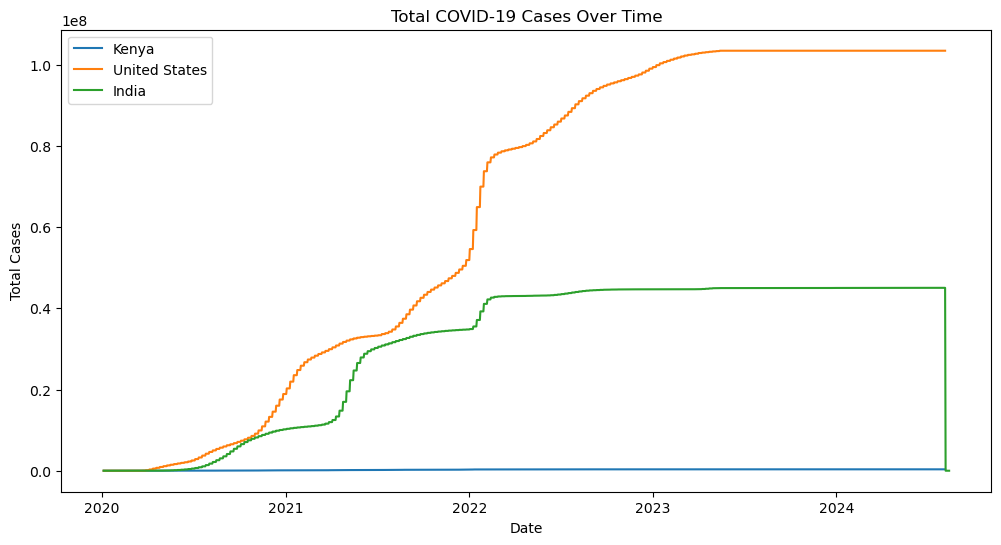

Latest Date in Dataset: 2024-08-04 00:00:00


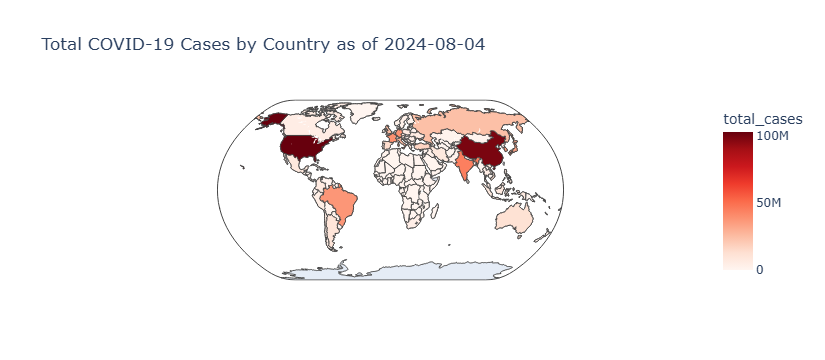

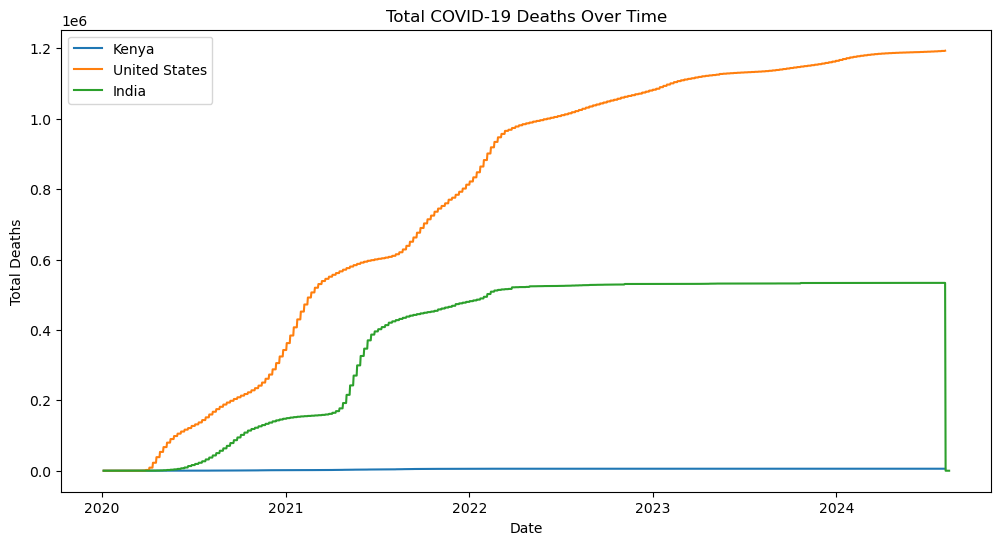

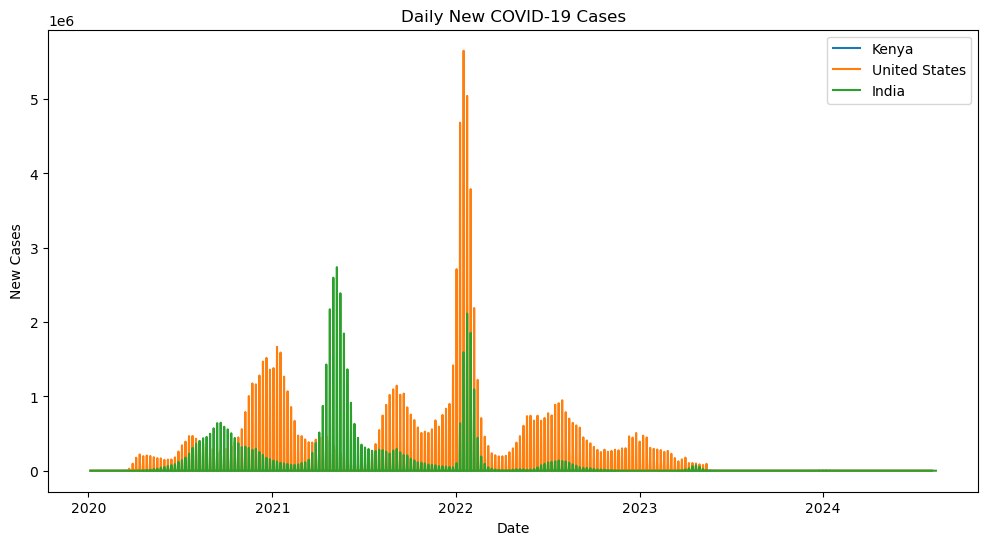

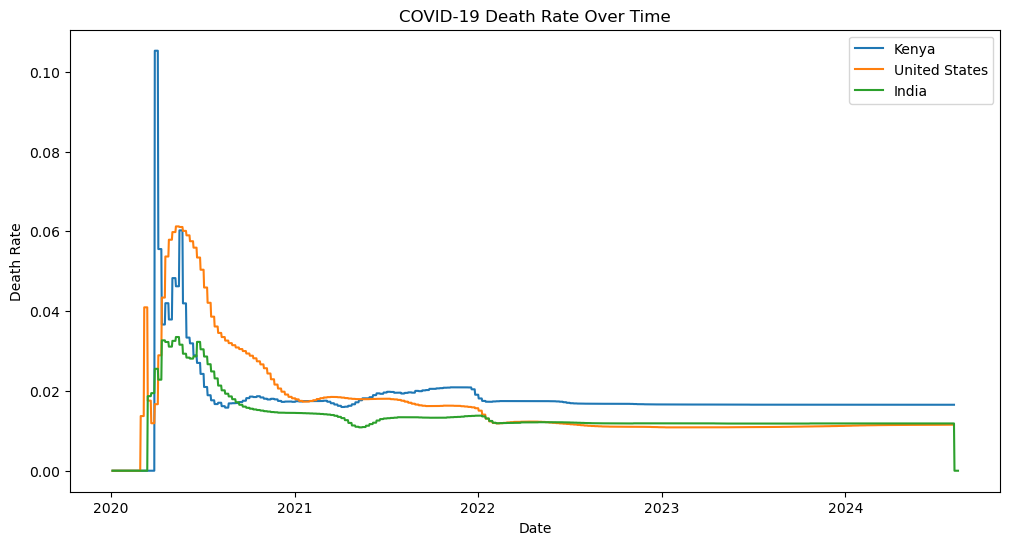

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

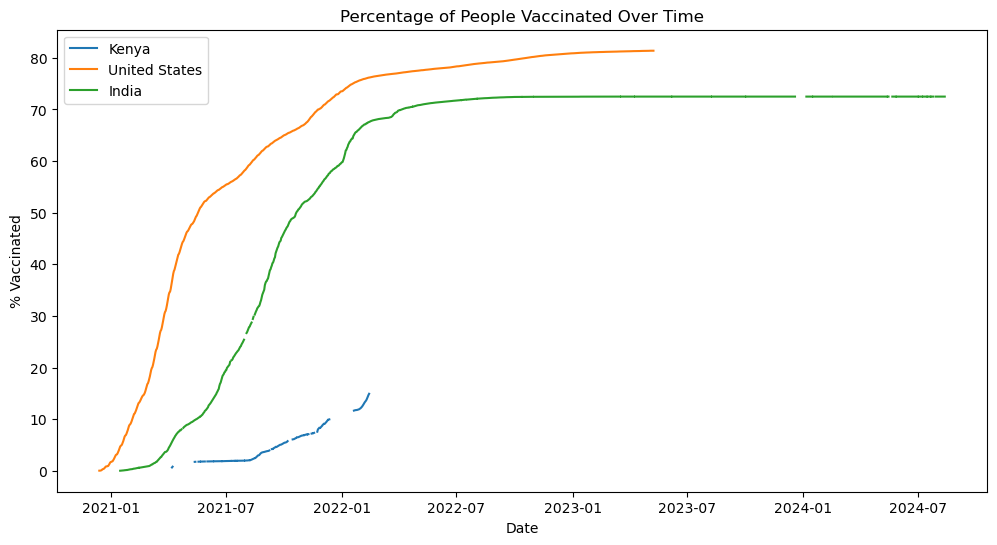

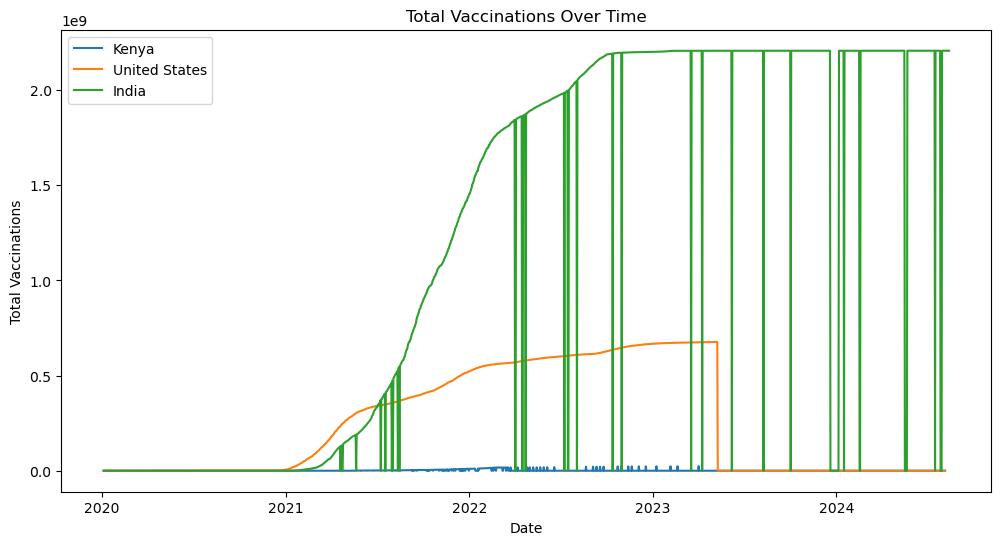

In [27]:
# Step 1: Data Collection, Data Loading & Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Show plots inside the notebook
%matplotlib inline

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Display shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Preview the dataset
df.head()

# Step 2: Data overview and missing values
df.info()
df.describe()
df.isnull().sum()


# Step 3: Data Cleaning

# Filter selected countries and make a copy to avoid SettingWithCopyWarning
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Convert date to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Fill missing values for selected columns
cols_to_fill = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df_filtered[cols_to_fill] = df_filtered[cols_to_fill].fillna(0)


# Step 4: Exploratory Data Analysis EDA 
#- i. Total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()


#Step 6: Optional: Build a Choropleth Map
# Drop rows with missing iso_code or total_cases
df = df[['location', 'iso_code', 'date', 'total_cases']]
df = df.dropna(subset=['iso_code', 'total_cases'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Get the latest date available in the dataset
latest_date = df['date'].max()
print("Latest Date in Dataset:", latest_date)

# Filter for the latest data only
latest_df = df[df['date'] == latest_date]

# Remove aggregates like 'World', 'Africa', etc. (optional but recommended)
latest_df = latest_df[latest_df['iso_code'].str.len() == 3]
# Plot Choropleth Map
fig = px.choropleth(
    latest_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title=f"Total COVID-19 Cases by Country as of {latest_date.date()}",
    projection="natural earth"
)

fig.show()


# ii. Total deaths over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()

#  iii. Daily new cases
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

# iv. Death rate per time
# Calculate death rate
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered['death_rate'] = df_filtered['death_rate'].fillna(0)  # Handle NaNs

# Plot death rate over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.show()

# v.  People vaccinated per time
#Check if available
print(df_filtered.columns)

# Column is available
if 'people_vaccinated_per_hundred' in df_filtered.columns:
    plt.figure(figsize=(12,6))
    for country in countries:
        country_data = df_filtered[df_filtered['location'] == country]
        plt.plot(country_data['date'], country_data['people_vaccinated_per_hundred'], label=country)
    plt.title("Percentage of People Vaccinated Over Time")
    plt.xlabel("Date")
    plt.ylabel("% Vaccinated")
    plt.legend()
    plt.show()

# Step 5: Visualizing Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Total Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()

# Step 6: Insights & Reporting



Step6: Key Insights from COVID-19 Data Analysis
United States had the highest total cases and vaccinations
Over the observed period, the US consistently reported the highest number of total COVID-19 cases and vaccinations compared to Kenya and India.

India achieved the highest vaccination growth rate
Although the US had higher total numbers, India’s vaccination rollout showed rapid growth over time, reflecting strong national efforts.

Kenya reported the lowest total cases but had a higher death rate
Despite fewer total cases, Kenya’s death rate (deaths as a percentage of confirmed cases) was higher, possibly due to limited testing and healthcare resources.

New daily cases varied significantly over time
All three countries experienced multiple waves of COVID-19 infections. The US and India had very sharp increases in new daily cases during specific periods, while Kenya had fewer fluctuations.

Death rate trends highlight health system disparities
The higher death rate in Kenya suggests differences in healthcare access or underreporting of mild cases. Meanwhile, India showed the lowest death rate due to widespread testing and younger population demographics.


This project compared COVID-19 data from Kenya, the USA, and India. It analyzed total cases, deaths, and vaccinations over time. Results showed that countries responded differently, with varying outcomes based on healthcare systems, population, and policies. These insights can help improve future health planning.